In [46]:
from scipy import *
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
from pylab import *

from scipy.stats import chi2
import matplotlib.patches as mpatches
from matplotlib.pyplot import errorbar
import math as m
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Part 4

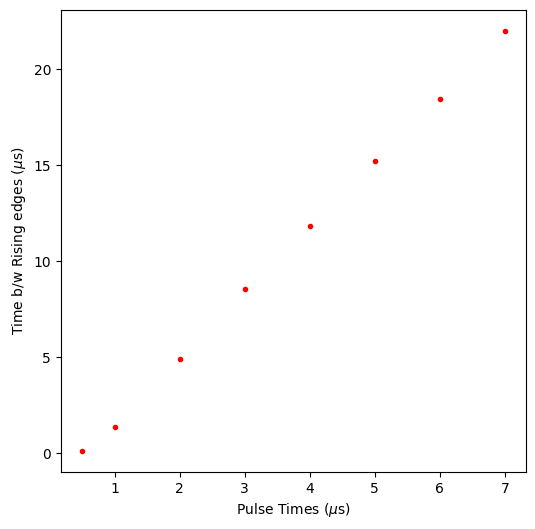

In [47]:
# Part a
pulseTimes = [0.5, 1, 2, 3, 4, 5, 6,7] # microseconds
deltaT = [0.11, 1.34, 4.89, 8.56,11.84, 15.24, 18.45, 22.02] # oscilloscope microseconds
figure(figsize=(6,6))
plot(pulseTimes, deltaT, 'r.')
xlabel(r'Pulse Times ($\mu$s)')
ylabel(r'Time b/w Rising edges ($\mu$s)')
show()

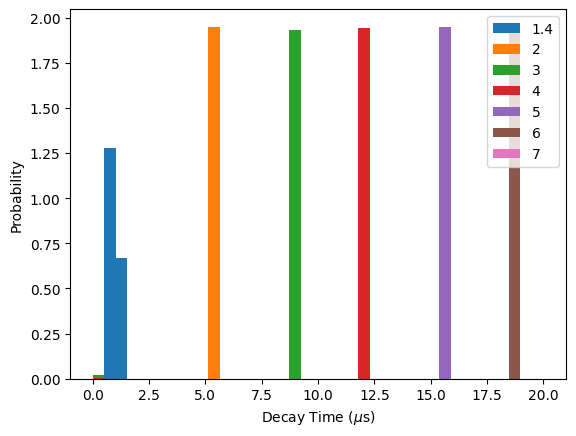

In [48]:
bins = np.linspace(0, 20, 40)

udecayt14 =loadtxt('ps=1.4.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt2 =loadtxt('ps=2.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt3 =loadtxt('ps=3.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt4 =loadtxt('ps=4.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt5 =loadtxt('ps=5.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt6 =loadtxt('ps=6.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt7 =loadtxt('ps=7.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)


decayt14 = []
decayt2 = []
decayt3 = []
decayt4 = []
decayt5 = []
decayt6 = []
decayt7 = []
for i in range(0, len(udecayt14), 1):
    if (udecayt14[i] < 20000):
        decayt14.append(udecayt14[i]/1000)

for i in range(0, len(udecayt2), 1):
    if (udecayt2[i] < 20000):
        decayt2.append(udecayt2[i]/1000)

for i in range(0, len(udecayt3), 1):
    if (udecayt3[i] < 20000):
        decayt3.append(udecayt3[i]/1000)

for i in range(0, len(udecayt4), 1):
    if (udecayt4[i] < 20000):
        decayt4.append(udecayt4[i]/1000)

for i in range(0, len(udecayt5), 1):
    if (udecayt5[i] < 20000):
        decayt5.append(udecayt5[i]/1000)

for i in range(0, len(udecayt6), 1):
    if (udecayt6[i] < 20000):
        decayt6.append(udecayt6[i]/1000)

for i in range(0, len(udecayt7), 1):
    if (udecayt7[i] < 20000):
        decayt7.append(udecayt7[i]/1000)

plt.hist(decayt14, bins,density = True, label='1.4')
plt.hist(decayt2, bins,density = True, label='2')
plt.hist(decayt3, bins,density = True, label='3')
plt.hist(decayt4, bins,density = True, label='4')
plt.hist(decayt5, bins,density = True, label='5')
plt.hist(decayt6, bins,density = True, label='6')
plt.hist(decayt7, bins,density = True, label='7')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')

legend(loc='upper right') 
show()

# Part 5

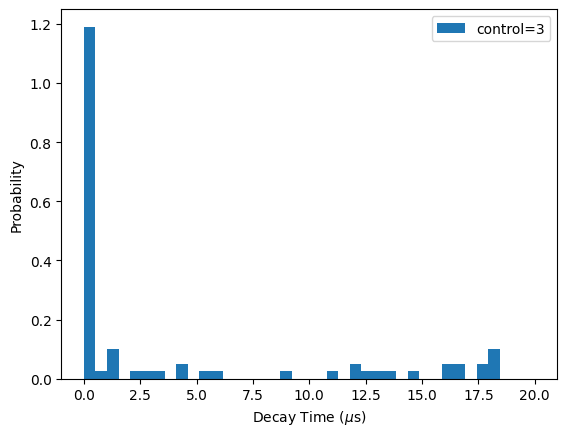

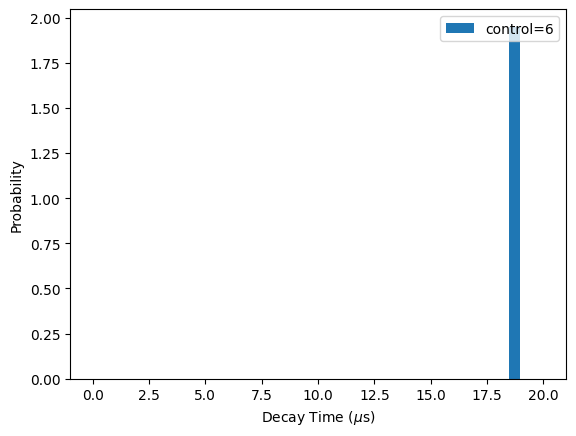

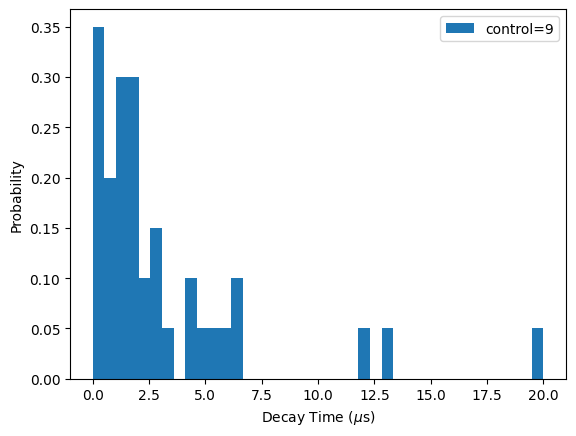

In [49]:
control = [1,2,3,4,5,6,7,8,9,10]
scopeVoltages = [0, 47.8,125.1, 189.5,257,318,381,435,494,543] # mV

udecayt3 =loadtxt('C=3.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt5 =loadtxt('C=6.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt9 =loadtxt('c=9.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)

decayt3 = []
decayt6 = []
decayt9 = []

for i in range(0, len(udecayt3), 1):
    if (udecayt3[i] < 20000):
        decayt3.append(udecayt3[i]/1000)

for i in range(0, len(udecayt6), 1):
    if (udecayt6[i] < 20000):
        decayt6.append(udecayt6[i]/1000)

for i in range(0, len(udecayt9), 1):
    if (udecayt9[i] < 20000):
        decayt9.append(udecayt9[i]/1000)


plt.hist(decayt3, bins,density = True, label='control=3')
#plt.hist(decayt5, bins,density = True, label='5')
#plt.hist(decayt9, bins,density = True, label='9')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')
legend(loc='upper right') 
show()
plt.hist(decayt6, bins,density = True, label='control=6')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')
legend(loc='upper right') 
show()

plt.hist(decayt9, bins,density = True, label='control=9')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')
legend(loc='upper right') 
show()


# Part 6

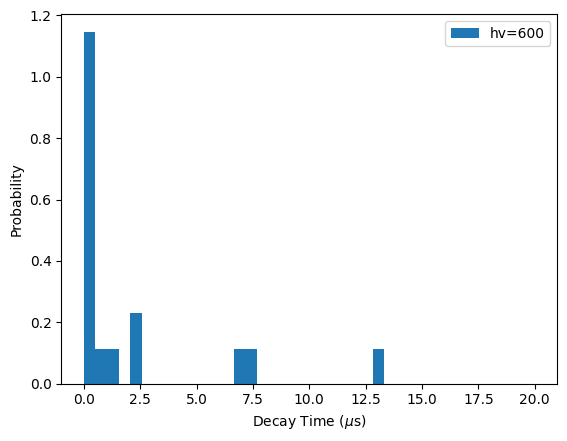

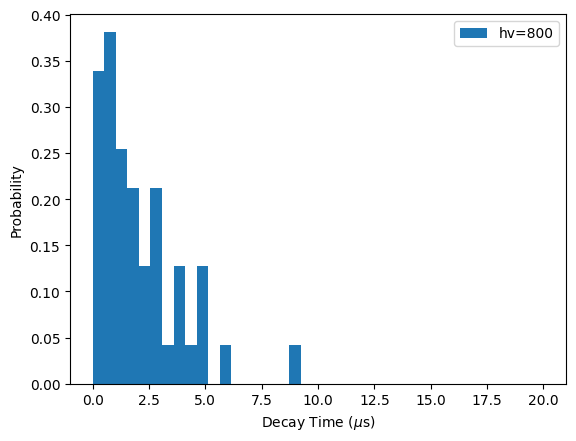

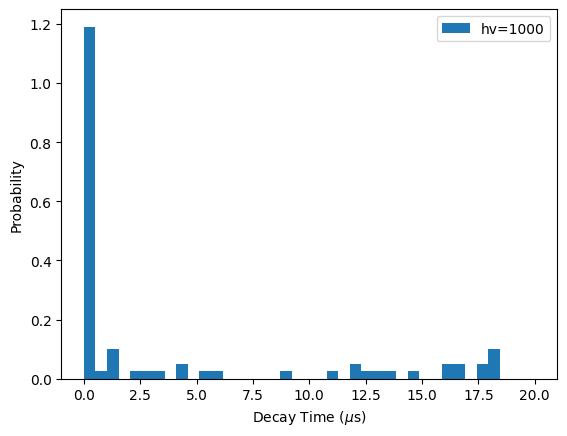

In [50]:


udecayt6h =loadtxt('hv=600.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt8h =loadtxt('hv=800.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)
udecayt1k =loadtxt('hv=1000.data',delimiter=' ',usecols=(0),skiprows=0,unpack=True)

decayt6h = []
decayt8h = []
decayt1k = []

for i in range(0, len(udecayt6h), 1):
    if (udecayt6h[i] < 20000):
        decayt6h.append(udecayt6h[i]/1000)

for i in range(0, len(udecayt8h), 1):
    if (udecayt8h[i] < 20000):
        decayt8h.append(udecayt8h[i]/1000)

for i in range(0, len(udecayt1k), 1):
    if (udecayt1k[i] < 20000):
        decayt1k.append(udecayt1k[i]/1000)


plt.hist(decayt6h, bins,density = True, label='hv=600')
#plt.hist(decayt5, bins,density = True, label='5')
#plt.hist(decayt9, bins,density = True, label='9')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')
legend(loc='upper right') 
show()
plt.hist(decayt8h, bins,density = True, label='hv=800')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')
legend(loc='upper right') 
show()

plt.hist(decayt1k, bins,density = True, label='hv=1000')
xlabel(r'Decay Time ($\mu$s)')
ylabel(r'Probability')
legend(loc='upper right') 
show()
